## Author: Nikki Mittal

## The Sparks Foundation

## Data Science and Business Analytics Intern


### GRIP DECEMBER 2022

## Task 3: Exploratory Data Analysis - Retail

### Identification of the weak areas in the business where profit can be increased

The dataset contains details of the sales, profit, discount and quantity of different segments, regions, cities, states and countries. The Exploratory Data Analysis needs to be conducted in order to analyze the areas where the profits can be increased.

### Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings(action= 'ignore')

### Loading the dataset


In [2]:
data = pd.read_csv('SampleSuperstore.csv')
print(data.shape)                 
data.head(5)         

(9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The dataset contains 9994 rows and 13 columns, having the details of the sales, profit, discount and quantity of different segments at different places.

In [3]:
#Renaming column names for clarity:

data.columns = ['Ship_Mode', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Category', 'Sub_Category', 'Sales', 'Quantity', 'Discount', 'Profit']
data.head(5)    #printing top 5 rows

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Exploring the dataset

In [4]:
#Understanding the data more:

data.describe()    #for statistical description of data

,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Considering the mean and standard deviation values, it seems that the dataset has outliers which need to be handled.

In [5]:
data.nunique()   #Unique values in different columns

Ship_Mode          4
Segment            3
Country            1
City             531
State             49
Postal_Code      631
Region             4
Category           3
Sub_Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Data Cleaning

In [6]:
#Checking the need for data cleaning:

data.info()      #gathering information about the non null count and data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship_Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal_Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub_Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


It seems that there are no null values in the dataset.

In [7]:
#Confirming if there are any null values
data.isnull().sum()     #Counting number of null values


Ship_Mode       0
Segment         0
Country         0
City            0
State           0
Postal_Code     0
Region          0
Category        0
Sub_Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:>

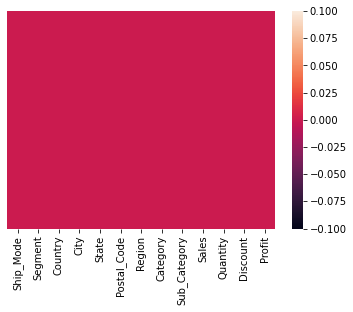

In [8]:
sns.heatmap(data.isnull(), yticklabels = False)   #Visualization of null values

Clearly, the dataset does not have any null values.

In [9]:
#Checking if there is any duplicate value

data.duplicated().sum()

17

There are duplicate values in the dataset which need to be removed.

In [10]:
#Removing duplicate values

data.drop_duplicates(inplace = True)

In [11]:
#Checking if there is any duplicate value left

data.duplicated().sum()

0

Clearly, there is no duplicate value in the dataset now.

In [12]:
data.shape

(9977, 13)

The dataset has reduced to 9977 rows.

In [13]:
#Dropping the irrelevant column Postal Code
data.drop(['Postal_Code'], axis = 1, inplace = True)

In [14]:
data.head()

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The Postal Code column has been dropped.

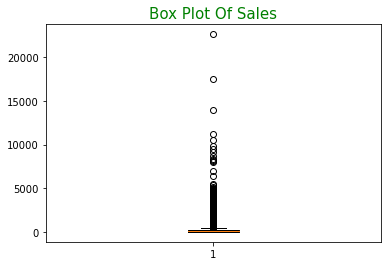

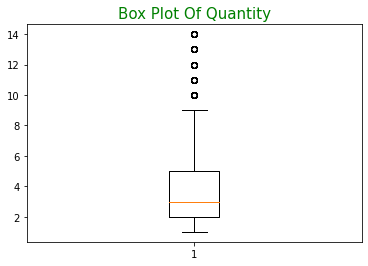

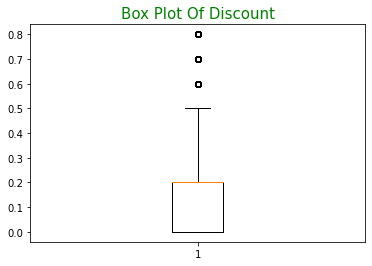

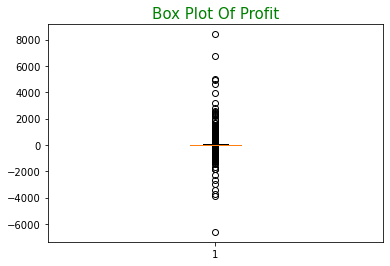

In [15]:
#Checking outliers in the dataset

columns = ['Sales', 'Quantity', 'Discount', 'Profit']
for x in columns:
    plt.figure()                                                #for plotting different boxplots
    plt.boxplot(data[x])
    plt.title(f"Box Plot Of {x}" , fontsize=15, color="green")
plt.show()
 

Clearly, the Sales, Quantity, Discount and Profit columns have outliers present in them which need to be dealt. 

In [16]:
#Identifying outliers in the Sales column

Q1 = data.Sales.quantile(0.25)
Q3 = data.Sales.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data[(data.Sales < lower_limit) | (data.Sales > upper_limit)]

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
11,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,911.4240,4,0.20,68.3568
...,...,...,...,...,...,...,...,...,...,...,...,...
9931,Standard Class,Consumer,United States,San Bernardino,California,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9942,Standard Class,Consumer,United States,Anaheim,California,West,Office Supplies,Storage,998.8200,9,0.00,29.9646
9947,Second Class,Corporate,United States,Indianapolis,Indiana,Central,Furniture,Chairs,1925.8800,6,0.00,539.2464
9948,Second Class,Corporate,United States,Indianapolis,Indiana,Central,Office Supplies,Appliances,2405.2000,8,0.00,793.7160


In [17]:
#Identifying outliers in the Profit column

Q1 = data.Profit.quantile(0.25)
Q3 = data.Profit.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data[(data.Profit < lower_limit) | (data.Profit > upper_limit)]

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
7,Standard Class,Consumer,United States,Los Angeles,California,West,Technology,Phones,907.1520,6,0.20,90.7152
10,Standard Class,Consumer,United States,Los Angeles,California,West,Furniture,Tables,1706.1840,9,0.20,85.3092
13,Standard Class,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,407.9760,3,0.20,132.5922
...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Standard Class,Home Office,United States,New Rochelle,New York,East,Office Supplies,Paper,223.9200,4,0.00,109.7208
9962,First Class,Home Office,United States,Houston,Texas,Central,Furniture,Bookcases,383.4656,4,0.32,-67.6704
9968,Standard Class,Consumer,United States,Plainfield,New Jersey,East,Office Supplies,Binders,735.9800,2,0.00,331.1910
9979,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Binders,437.4720,14,0.20,153.1152


In [18]:
#Identifying outliers in the Discount column

Q1 = data.Discount.quantile(0.25)
Q3 = data.Discount.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data[(data.Discount < lower_limit) | (data.Discount > upper_limit)]

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Appliances,68.810,5,0.8,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,Central,Office Supplies,Binders,2.544,3,0.8,-3.8160
28,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,9.618,2,0.7,-7.0532
32,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Binders,6.858,6,0.7,-5.7150
36,First Class,Corporate,United States,Richardson,Texas,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...
9870,First Class,Corporate,United States,Mason,Ohio,East,Office Supplies,Binders,22.428,3,0.7,-17.9424
9877,First Class,Home Office,United States,Cleveland,Ohio,East,Office Supplies,Binders,8.700,5,0.7,-6.3800
9903,Standard Class,Consumer,United States,Carrollton,Texas,Central,Furniture,Furnishings,25.128,3,0.6,-6.9102
9920,Standard Class,Corporate,United States,Bryan,Texas,Central,Office Supplies,Binders,22.386,7,0.8,-35.8176


In [19]:
#Identifying outliers in the Quantity column

Q1 = data.Quantity.quantile(0.25)
Q3 = data.Quantity.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data[(data.Quantity < lower_limit) | (data.Quantity > upper_limit)]

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
113,Second Class,Consumer,United States,Columbus,Ohio,East,Office Supplies,Fasteners,40.096,14,0.2,14.5348
139,Standard Class,Consumer,United States,Roseville,California,West,Furniture,Furnishings,43.120,14,0.0,20.6976
147,Standard Class,Corporate,United States,Franklin,Wisconsin,Central,Technology,Phones,384.450,11,0.0,103.8015
251,Standard Class,Consumer,United States,San Diego,California,West,Technology,Accessories,3347.370,13,0.0,636.0003
329,First Class,Consumer,United States,Philadelphia,Pennsylvania,East,Office Supplies,Labels,100.240,10,0.2,33.8310
...,...,...,...,...,...,...,...,...,...,...,...,...
9882,First Class,Consumer,United States,Woodstock,Georgia,South,Technology,Accessories,272.610,13,0.0,98.1396
9895,Standard Class,Consumer,United States,Chicago,Illinois,Central,Technology,Accessories,153.824,11,0.2,38.4560
9941,Standard Class,Consumer,United States,San Francisco,California,West,Technology,Accessories,223.580,14,0.0,87.1962
9979,Standard Class,Home Office,United States,Los Angeles,California,West,Office Supplies,Binders,437.472,14,0.2,153.1152


The outliers cannot be removed as removal of these outliers will reduce the dataset entries to a large extent and these outliers are not going to affect the further analysis much.

### Visualizing the data

#### Univariate Analysis

Text(0, 0.5, 'Count')

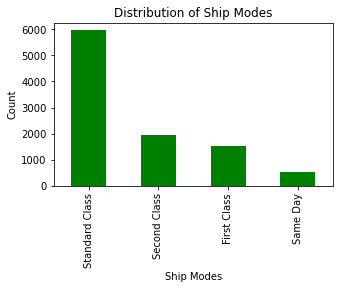

In [20]:
#Analysis of Ship Mode Distribution

data.Ship_Mode.value_counts().nlargest(20).plot(kind = 'bar', figsize = (5,3), color = ['green'])
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Modes')
plt.ylabel('Count')


The Standard Class ship mode is preferred by most of the customers, followed by Second class, first class and same day shipping respectively.

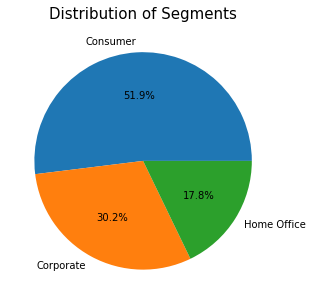

In [21]:
#Checking the distribution of the different segments:

a= data["Segment"].value_counts()
labels = a.index
values = a.values

plt.figure(figsize= (8, 5))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.rc('font', size=15)
plt.title("Distribution of Segments", fontsize = 15)
plt.show()

This plot shows that the Consumer segment contributes the highest percentage to the business followed by Corporate and Home Office respectively.

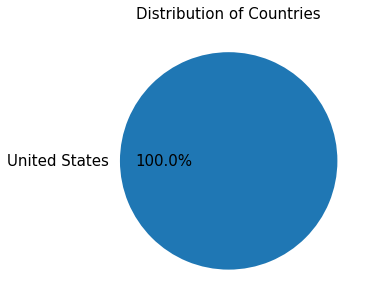

In [22]:
#Checking the distribution of the different countries:

b = data["Country"].value_counts()
labels = b.index
values = b.values

plt.figure(figsize = (8, 5))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.rc('font', size = 15)
plt.title("Distribution of Countries", fontsize=15)
plt.show()

The dataset is provided for the country United States only. As the entire dataset is of United States, this column can be dropped.

In [23]:
#Dropping the irrelevant column Country

data.drop(['Country'], axis = 1, inplace = True)
data.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


The Country column has been dropped.

Text(0, 0.5, 'Count')

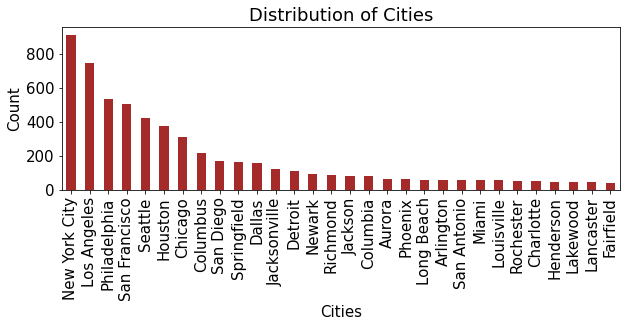

In [24]:
#To know the distributions of top 30 cities:

data.City.value_counts().nlargest(30).plot(kind = 'bar', figsize = (10,3), color = ['brown'])
plt.title('Distribution of Cities')
plt.xlabel('Cities')
plt.ylabel('Count')


The New York city provides the maximum number of customers followed by Los Angeles, Philadelphia, San Francisco and Seattle respectively. 

Text(0, 0.5, 'Count')

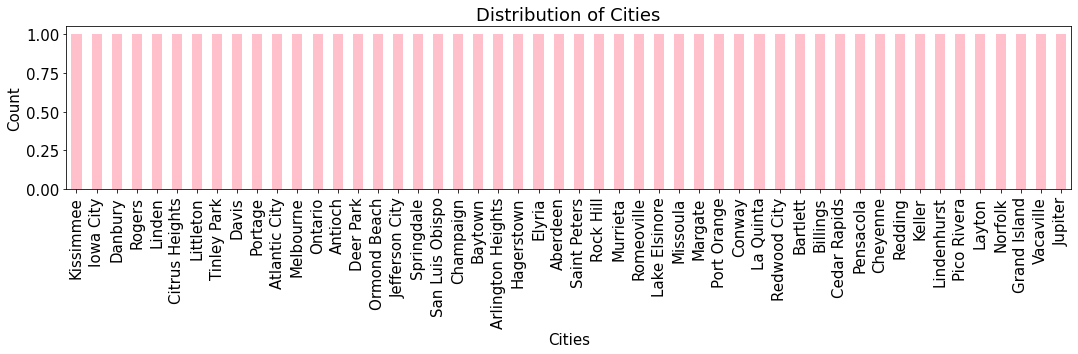

In [25]:
#To know the bottom 30 cities:

data.City.value_counts().nsmallest(50).plot(kind = 'bar', figsize = (18,3), color = ['pink'])
plt.title('Distribution of Cities')
plt.xlabel('Cities')
plt.ylabel('Count')


These are the cities which need to be focussed as the customers from these cities are very less.

Text(0.5, 1.0, 'Distribution of States')

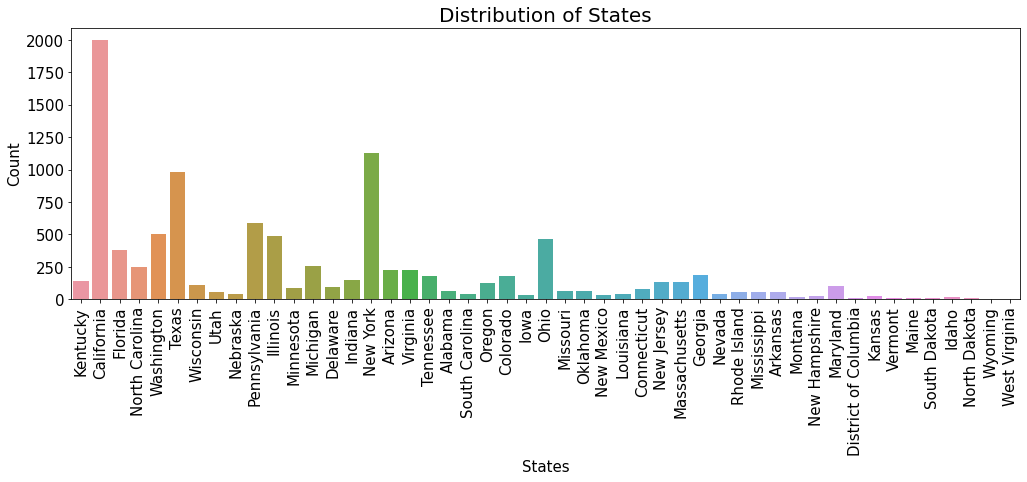

In [26]:
#To know the distributions of states:

plt.figure(figsize = (17,5))
f = sns.countplot(x='State', data = data)
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
f.set_xlabel("States", fontsize = 15)
f.set_ylabel("Count", fontsize = 15)
f.set_title('Distribution of States', fontsize = 20)


The maximum number of customers are from California state. West Viginia, Wyoming, North Dakota, Idaho etc. are among those states which are contributing least to the business. These states must be focussed in order to increase the sales of the business.

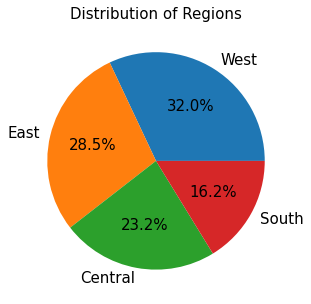

In [27]:
#Checking the distribution of the different Regions:

d = data["Region"].value_counts()
labels = d.index
values = d.values

plt.figure(figsize = (8, 5))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.rc('font', size = 15)
plt.title("Distribution of Regions", fontsize=15)
plt.show()

The maximum number of customers belong to the Western region. South region must be focussed to increase the sales.

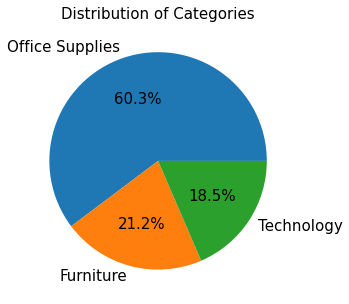

In [28]:
#Checking the distribution of the different Categories:

e = data["Category"].value_counts()
labels = e.index
values = e.values

plt.figure(figsize = (8, 5))
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.rc('font', size = 15)
plt.title("Distribution of Categories", fontsize=15)
plt.show()

The maximum number of customers are from Office Supplies categories, followed by Furniture and Technology categories. 

Text(0.5, 1.0, 'Distribution of Sub-Categories')

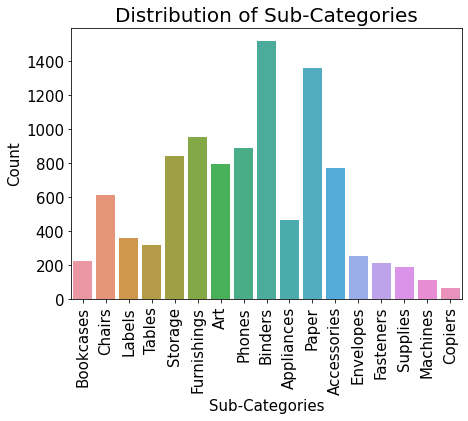

In [29]:
#Checking the distribution of the different Sub-Categories:

plt.figure(figsize=(7,5))
f = sns.countplot(x='Sub_Category', data = data)
f.set_xticklabels(f.get_xticklabels(), rotation = 90)
f.set_xlabel("Sub-Categories", fontsize = 15)
f.set_ylabel("Count", fontsize = 15)
f.set_title('Distribution of Sub-Categories', fontsize = 20)

The Binders, Paper, Furnishings are among the top sub-categories and Copiers, Machines, Fasteners, Envelopes and Bookcases are among the least selling sub-categories.

Text(0.5, 1.0, 'Distribution of Sales')

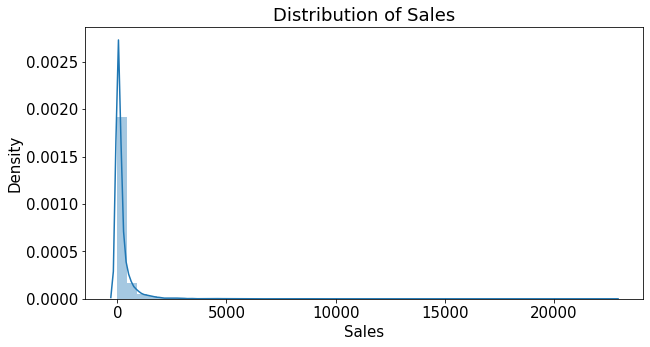

In [30]:
#Distribution of Sales

plt.figure(figsize = (10,5))
sns.distplot(data.Sales)
plt.title("Distribution of Sales")

The sales generated by most of the customers is <1250 USD. In some cases, the sales goes even >5,000 USD.

Text(0.5, 1.0, 'Distribution of Quantity')

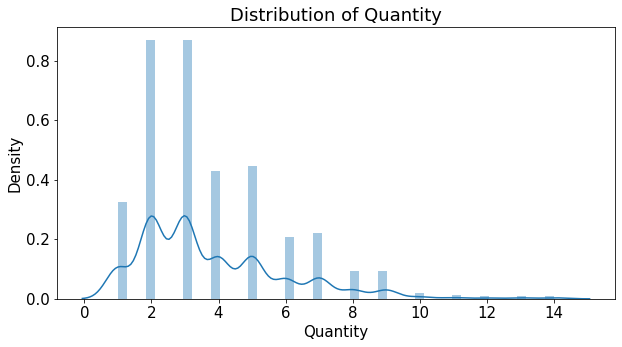

In [31]:
#Distribution of Quantity

plt.figure(figsize = (10,5))
sns.distplot(data.Quantity)
plt.title("Distribution of Quantity")

The quantity of products purchased usually lies between the range of 1 to 10 but in some of the cases, customers buy >10 quantities of a product.

Text(0.5, 1.0, 'Distribution of Discount')

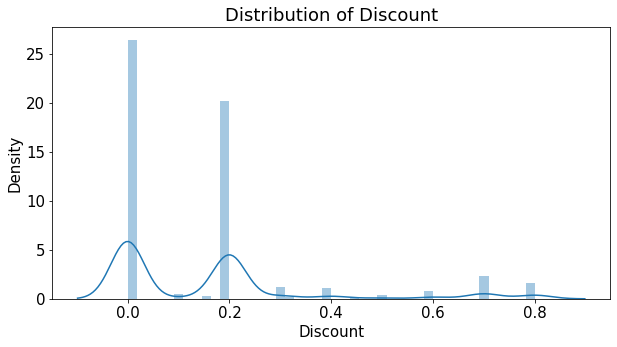

In [32]:
#Distribution of Discount

plt.figure(figsize = (10,5))
sns.distplot(data.Discount)
plt.title("Distribution of Discount")

Based on the purchases, the discount of 20 percentage is usually applied.

Text(0.5, 1.0, 'Distribution of Profit')

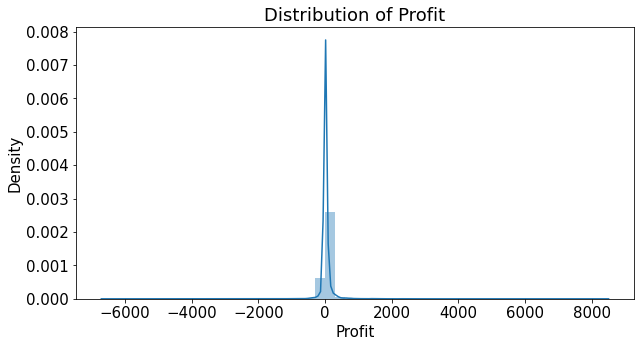

In [33]:
#Distribution of Profit

plt.figure(figsize = (10,5))
sns.distplot(data.Profit)
plt.title("Distribution of Profit")

The profit generated by most of the purchases lies between 0 to 500 USD. The loss is also in the similar range. In some of the cases, the profit goes even >8000 USD, while loss goes even > 6000 USD.

#### Bivariate Analysis

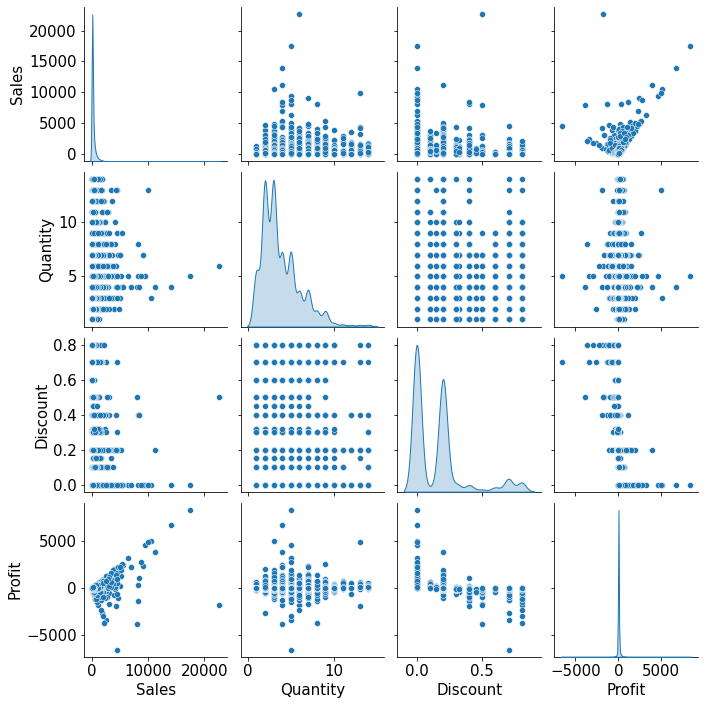

In [34]:
#Plotting a pairplot to analyse the relationships among all the numeric variables

sns.pairplot(data, diag_kind = 'kde')

<AxesSubplot:>

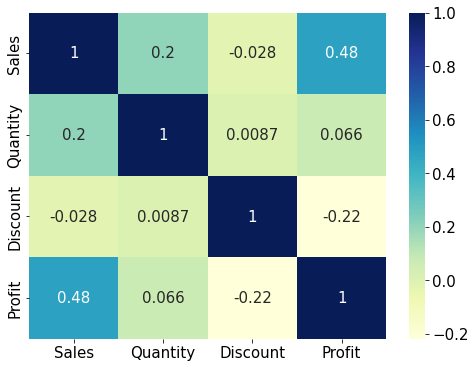

In [35]:
#Correlation Plot
plt.subplots(figsize = (8, 6)) 
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)

The correlation plot gives interesting results.
1. The sales generated and the quantity purchased are poorly positively correlated with a correlation coefficient of 0.2.
2. The sales generated and the discount applied are poorly negatively correlated with a correlation coefficient of -0.028.
3. The sales generated and the profit are positively correlated with a correlation coefficient of 0.48.
4. The quantity purchased and the discount applied are very poorly correlated and same is the case with Quantity and Profit.
5. The discount applied and profit generated are poorly negatively correlated with a correlation coefficient of -0.22.

#### Multivariate Analysis

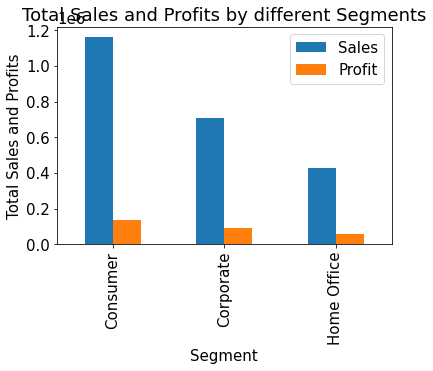

In [36]:
#Segmentwise Sales and Profit

data.groupby('Segment')['Sales', 'Profit'].agg(sum).plot(kind = 'bar')
plt.title('Total Sales and Profits by different Segments')
plt.ylabel('Total Sales and Profits')
plt.show()

The Consumer segment is generating the maximum Sales and profit. The company needs to focus on Corporate and Home Office segments in order to increase its profit.

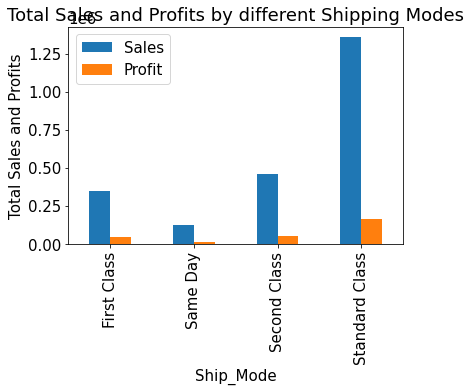

In [37]:
#Sales and Profit per Shipping Mode

data.groupby('Ship_Mode')['Sales', 'Profit'].agg(sum).plot(kind = 'bar')
plt.title('Total Sales and Profits by different Shipping Modes')
plt.ylabel('Total Sales and Profits')
plt.show()

The maximum profits and sales are generated from Standard Class Shipment mode whereas the least sales and profits are generated from the same day delivery.

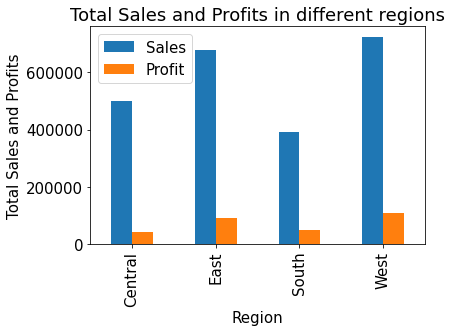

In [38]:
#Regionwise Sales and Profit 

data.groupby('Region')['Sales', 'Profit'].agg(sum).plot(kind = 'bar')
plt.title('Total Sales and Profits in different regions')
plt.ylabel('Total Sales and Profits')
plt.show()

The Western and Eastern regions are generating the maximum sales and profits whereas the Central and Southern regions need to be focussed in order to increase the sales and profits.

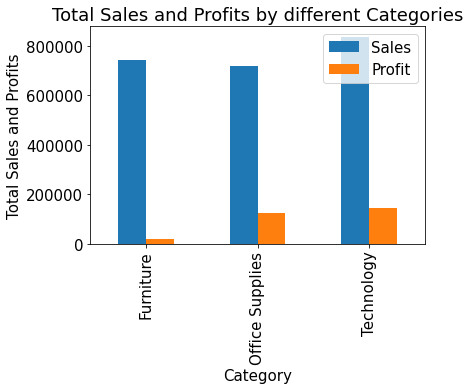

In [39]:
#Sales and Profit per Category

data.groupby('Category')['Sales', 'Profit'].agg(sum).plot(kind = 'bar')
plt.title('Total Sales and Profits by different Categories')
plt.ylabel('Total Sales and Profits')
plt.show()

The Furniture category generates more sales than that of office supplies but it is generating less profit than that of office supplies. The Office Supplies and Technology are generating almost similar profits although the sales by Technology is maximum. This indicates that the company needs to figure out the region why Furniture is not generating much profit and how the profit by Technology category can be increased.

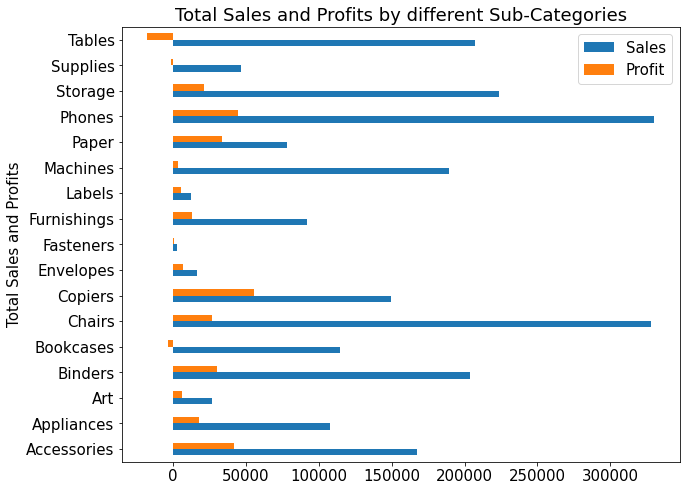

In [40]:
#Sales and Profit per Sub-Category

data.groupby('Sub_Category')['Sales', 'Profit'].agg(sum).plot(kind = 'barh', figsize = (10,8))
plt.title('Total Sales and Profits by different Sub-Categories')
plt.ylabel('Total Sales and Profits')
plt.show()

The sub-categories such as Bookcases, Supplies and Tables generate loss for the company. Therefore, the company needs to focus on these areas in order to change the loss into profit.

<AxesSubplot:title={'center':'Sales versus Profit'}, xlabel='Sales', ylabel='Profit'>

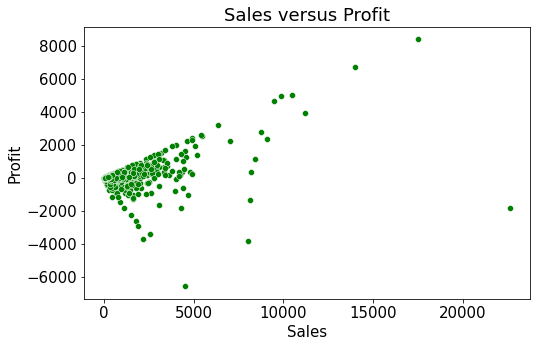

In [41]:
#Identifying the relationship between sales and profits

plt.figure(figsize = (8,5))
plt.xticks(rotation = 0)
plt.title("Sales versus Profit")

sns.scatterplot(x="Sales", y="Profit", data = data, color = 'green')


This plot shows that for sales <5000 USD, the company has beared a significant loss. The regions and products responsible for this loss need to be targeted in order to minimise or eliminate this loss.

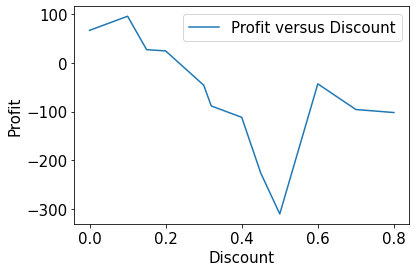

In [42]:
#Profit versus Discount

sns.lineplot(x = 'Discount', y = 'Profit', data = data, label = 'Profit versus Discount', ci = None)
plt.show()

The company gets profit when discount applied on purchases is upto 20%. If the discount is >20%, the company starts facing losses. Therefore, in order to minimise or eliminate the losses, the company should provide a maximum of 20% discount on its products.

<AxesSubplot:xlabel='Region', ylabel='Profit'>

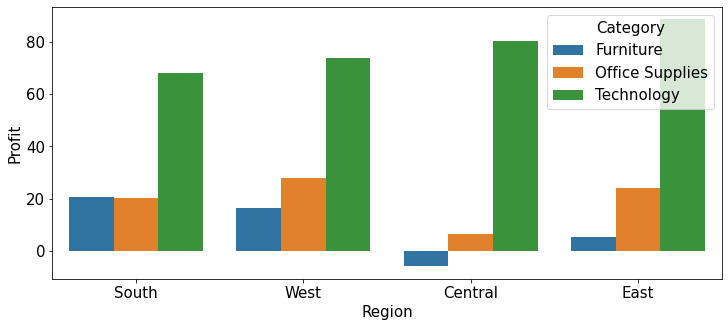

In [43]:
#Regionwise and Categorywise Profits

plt.figure(figsize = (12,5))
sns.barplot(data = data, x = 'Region', y = 'Profit', hue = 'Category', ci = None)


The Furniture category in the central region is generating loss. The reason behind this needs to be found out. 
The sales in the Central and East regions can be increased so that accordingly profits could be increased.

### The areas which need to be focussed in order to increase the profits:

1. Cities such as Davis, Portage, Conway etc. generate very less sales. These cities can be focussed to increase the sales and ultimately the profit.
2. West Viginia, Wyoming, North Dakota, Idaho etc. are among those states which are contributing least to the business. These states must be focussed in order to increase the sales of the business.
3. South region must be targeted to increase the profits.
4. The Technology category products should be improved to increase sales.
5. Copiers, Machines, Fasteners, Envelopes and Bookcases are among the least selling sub-categories.
6. The company needs to focus on Corporate and Home Office segments in order to increase its profit.
7. The sub-categories such as Bookcases, Supplies and Tables generate loss for the company. Therefore, the company needs to target these areas in order to change the loss into profit.
8. The Furniture category in the central region is generating loss. The reason behind this needs to be found out. The sales in the Central and East regions can be increased so that accordingly profits could be increased.

### Insights

1. The Standard Class ship mode is preferred by most of the customers, followed by Second class, first class and same day shipping respectively.
2. The Consumer segment contributes the highest percentage to the business followed by Corporate and Home Office respectively.
3. The New York city provides the maximum number of customers followed by Los Angeles, Philadelphia, San Francisco and Seattle respectively.
4. The maximum number of customers are from California state. West Viginia, Wyoming, North Dakota, Idaho etc. are among those states which are contributing least to the business. These states must be focussed in order to increase the sales of the business.
5. The maximum number of customers come from the Western region.
6. The maximum number of customers are from Office Supplies categories, followed by Furniture and Technology categories.
7. The Binders, Paper, Furnishings are among the top sub-categories. 
8. The maximum profits and sales are generated from Standard Class Shipment mode whereas the least sales and profits are generated from the same day delivery.
9. The Furniture category generates more sales than that of office supplies but it is generating less profit than that of office supplies. The Office Supplies and Technology are generating almost similar profits although the sales by Technology is maximum. This indicates that the company needs to figure out the region why Furniture is not generating much profit and how the profit by Technology category can be increased.
10. For sales <5000 USD, the company has beared a significant loss. The regions and products responsible for this loss need to targeted in order to minimise or eliminate this loss.
11. The company gets profit when discount applied on purchases is upto 20%. If the discount is >20%, the company starts facing losses. Therefore, in order to minimise or eliminate the losses, the company should provide a maximum of 20% discount on its products.
